

**고정점 반복법(Fixed Point Iteration)**은 비선형 방정식 $f(x)=0$ 의 근을 찾기 위한 수치 해석 방법 중 하나입니다. 이 방법은 방정식을 고정점 방정식 $x=g(x)$ 로 변환하고, 반복 과정을 통해 근에 수렴하는 점을 찾는 방법입니다.


**고정점 반복법의 기본 아이디어**

1.  **방정식 변환:**

-  주어진 방정식 $f(x)=0$ 을 고정점 방정식 $x=g(x)$ 형태로 변환합니다. 여기서 $g(x)$ 는 연속 함수이며, 우리가 찾고자 하는 근은 $x=g(x)$ 를 만족하는 값입니다.

1.  **반복 과정:**

-  임의의 초기 추정치 $x_0$ 를 선택하고, 반복적으로 다음과 같은 식을 사용하여 새로운 추정치 $x_{n+1}$ 를 계산합니다.

$$x_{n+1} =g(x_n )$$

-  이 과정을 반복하여 $x_n$ 이 $x=g(x)$ 에 수렴하도록 합니다.

**수렴 조건**


고정점 반복법이 수렴하기 위해서는 $g(x)$ 함수가 특정 구간 내에서 다음과 같은 조건을 만족해야 합니다:

1.  **함수의 연속성:**

-  $g(x)$ 는 연속 함수여야 합니다.

1.  **함수의 기울기 조건:**

-  구간 $[a,b]$ 에서 $g^{\prime } (x)|<1$ 을 만족해야 합니다. 즉, $g(x)$ 의 기울기가 1보다 작아야 합니다.
-  이 조건을 만족하면, $g(x)$ 는 수렴하는 반복 과정을 가질 수 있습니다.

**고정점 반복법의 장점과 단점**

-  **장점:**
-  구현이 간단하고 계산이 비교적 빠릅니다.
-  초기 추정치에 따라 수렴 속도가 빠를 수 있습니다.
-  **단점:**
-  모든 함수가 고정점 반복법을 통해 수렴하는 것은 아닙니다.
-  적절한 $g(x)$ 를 선택하는 것이 어렵고, $|g^{\prime } (x)|<1$ 조건을 항상 만족시키는 $g(x)$ 를 찾기 어려울 수 있습니다.
-  수렴 속도가 느릴 수 있으며, 발산할 수도 있습니다.

**예제 설명****주어진 예제**

-  방정식 $f(x)=e^{-x} -x$ 의 근을 찾는 문제입니다.
-  이 방정식을 고정점 방정식으로 변환하면: $x=g(x)=e^{-x}$
-  이때, 함수 $g(x)=e^{-x}$ 를 사용하여 반복적으로 근을 추정합니다.

**알고리즘**

1.  **초기화:**

-  초기 추정치 $x_0$ 를 선택합니다.
-  이 예제에서는 $x_0 =1$ 을 사용합니다.

1.  **반복:**

-  새로운 추정치 $x_{n+1}$ 을 다음과 같이 계산합니다:

 $x_{n+1} =e^{-x_n }$ ​

-  이 과정을 반복하여 근에 수렴합니다.

1.  **오차 계산:**

-  각 반복 단계에서 상대 오차 $\epsilon_a$ ​와 참 상대 오차 $\epsilon_t$ 를 계산하여 수렴 여부를 확인합니다.
-  상대 오차는 $\epsilon_a =\left|\frac{x_{n+1} -x_n }{x_{n+1} }\right|\times 100\%$ 로 계산됩니다.

1.  **수렴 조건:**

-  상대 오차가 허용 오차(예제에서는 $0.5\%$ )보다 작아지거나, 최대 반복 횟수에 도달하면 반복을 종료합니다.

In [1]:
function NA6_1_FixedPoint(x)
    % 함수 정의 및 초기 설정
    func = @(x) exp(-x);
    err_s = 0.5e-2;
    x_true = 0.56714329; % 실제 근 (참값)
    x_new = x;
    iter = 0;

    % 추정치와 오차를 저장할 배열
    xr_values = [];
    error_a_values = [];
    error_t_values = [];

    % 고정점 반복법 수행
    while true
        iter = iter + 1;
        x_old = x_new;
        x_new = func(x_new);

        % 추정치 저장
        xr_values = [xr_values, x_new];

        % 상대 오차 계산
        err_a = abs((x_new - x_old) / (x_new));
        err_t = abs((x_new - x_true) / (x_true)); % 참 상대 오차
        error_a_values = [error_a_values, err_a * 100]; % 상대 오차 저장
        error_t_values = [error_t_values, err_t * 100]; % 참 상대 오차 저장

        % 출력
        fprintf('Iter: %d, root: %.6f, ε_a: %.4f %%, ε_t: %.4f %%\n', iter, x_new, err_a*100, err_t*100);

        % 허용 오차 확인
        if (err_a <= err_s), break; end
        if iter >= 20, break; end
    end

    % 결과 표 출력
    T = table((1:iter)', xr_values', error_a_values', error_t_values', 'VariableNames', {'Iteration', 'Estimate', 'RelativeError', 'TrueRelativeError'});
    disp(T);

    % 시각화
    figure;
    plot(1:iter, xr_values, 'b-o', 'LineWidth', 1.5); % 추정된 근의 변화
    hold on;
    yline(x_true, 'g--', 'LineWidth', 2); % 실제 근 표시
    xlabel('Iteration');
    ylabel('Estimate');
    title('고정점 반복법을 통한 근 추정');
    legend('Estimate', 'True Root');
    grid on;

    % 근 값을 표시
    figure;
    plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5);
    hold on;
    scatter(xr_values(end), 0, 'gx', 'LineWidth', 2); % 최종 추정된 근 표시
    text(xr_values(end), 0.1, sprintf('%.6f', xr_values(end)), 'Color', 'green', 'FontSize', 10); % 근 값 표시
    xlabel('x');
    ylabel('f(x)');
    title('고정점 반복법의 최종 추정된 근');
    grid on;
end

Iter: 1, root: 0.367879, ε_a: 171.8282 %, ε_t: 35.1347 %
Iter: 2, root: 0.692201, ε_a: 46.8536 %, ε_t: 22.0504 %
Iter: 3, root: 0.500474, ε_a: 38.3091 %, ε_t: 11.7554 %
Iter: 4, root: 0.606244, ε_a: 17.4468 %, ε_t: 6.8942 %
Iter: 5, root: 0.545396, ε_a: 11.1566 %, ε_t: 3.8346 %
Iter: 6, root: 0.579612, ε_a: 5.9034 %, ε_t: 2.1986 %
Iter: 7, root: 0.560115, ε_a: 3.4809 %, ε_t: 1.2392 %
Iter: 8, root: 0.571143, ε_a: 1.9308 %, ε_t: 0.7053 %
Iter: 9, root: 0.564879, ε_a: 1.1089 %, ε_t: 0.3992 %
Iter: 10, root: 0.568429, ε_a: 0.6244 %, ε_t: 0.2267 %
Iter: 11, root: 0.566415, ε_a: 0.3556 %, ε_t: 0.1285 %
    Iteration    Estimate    RelativeError    TrueRelativeError
    _________    ________    _____________    _________________
        1        0.36788         171.83             35.135     
        2         0.6922         46.854              22.05     
        3        0.50047         38.309             11.755     
        4        0.60624         17.447             6.8942     
        5  


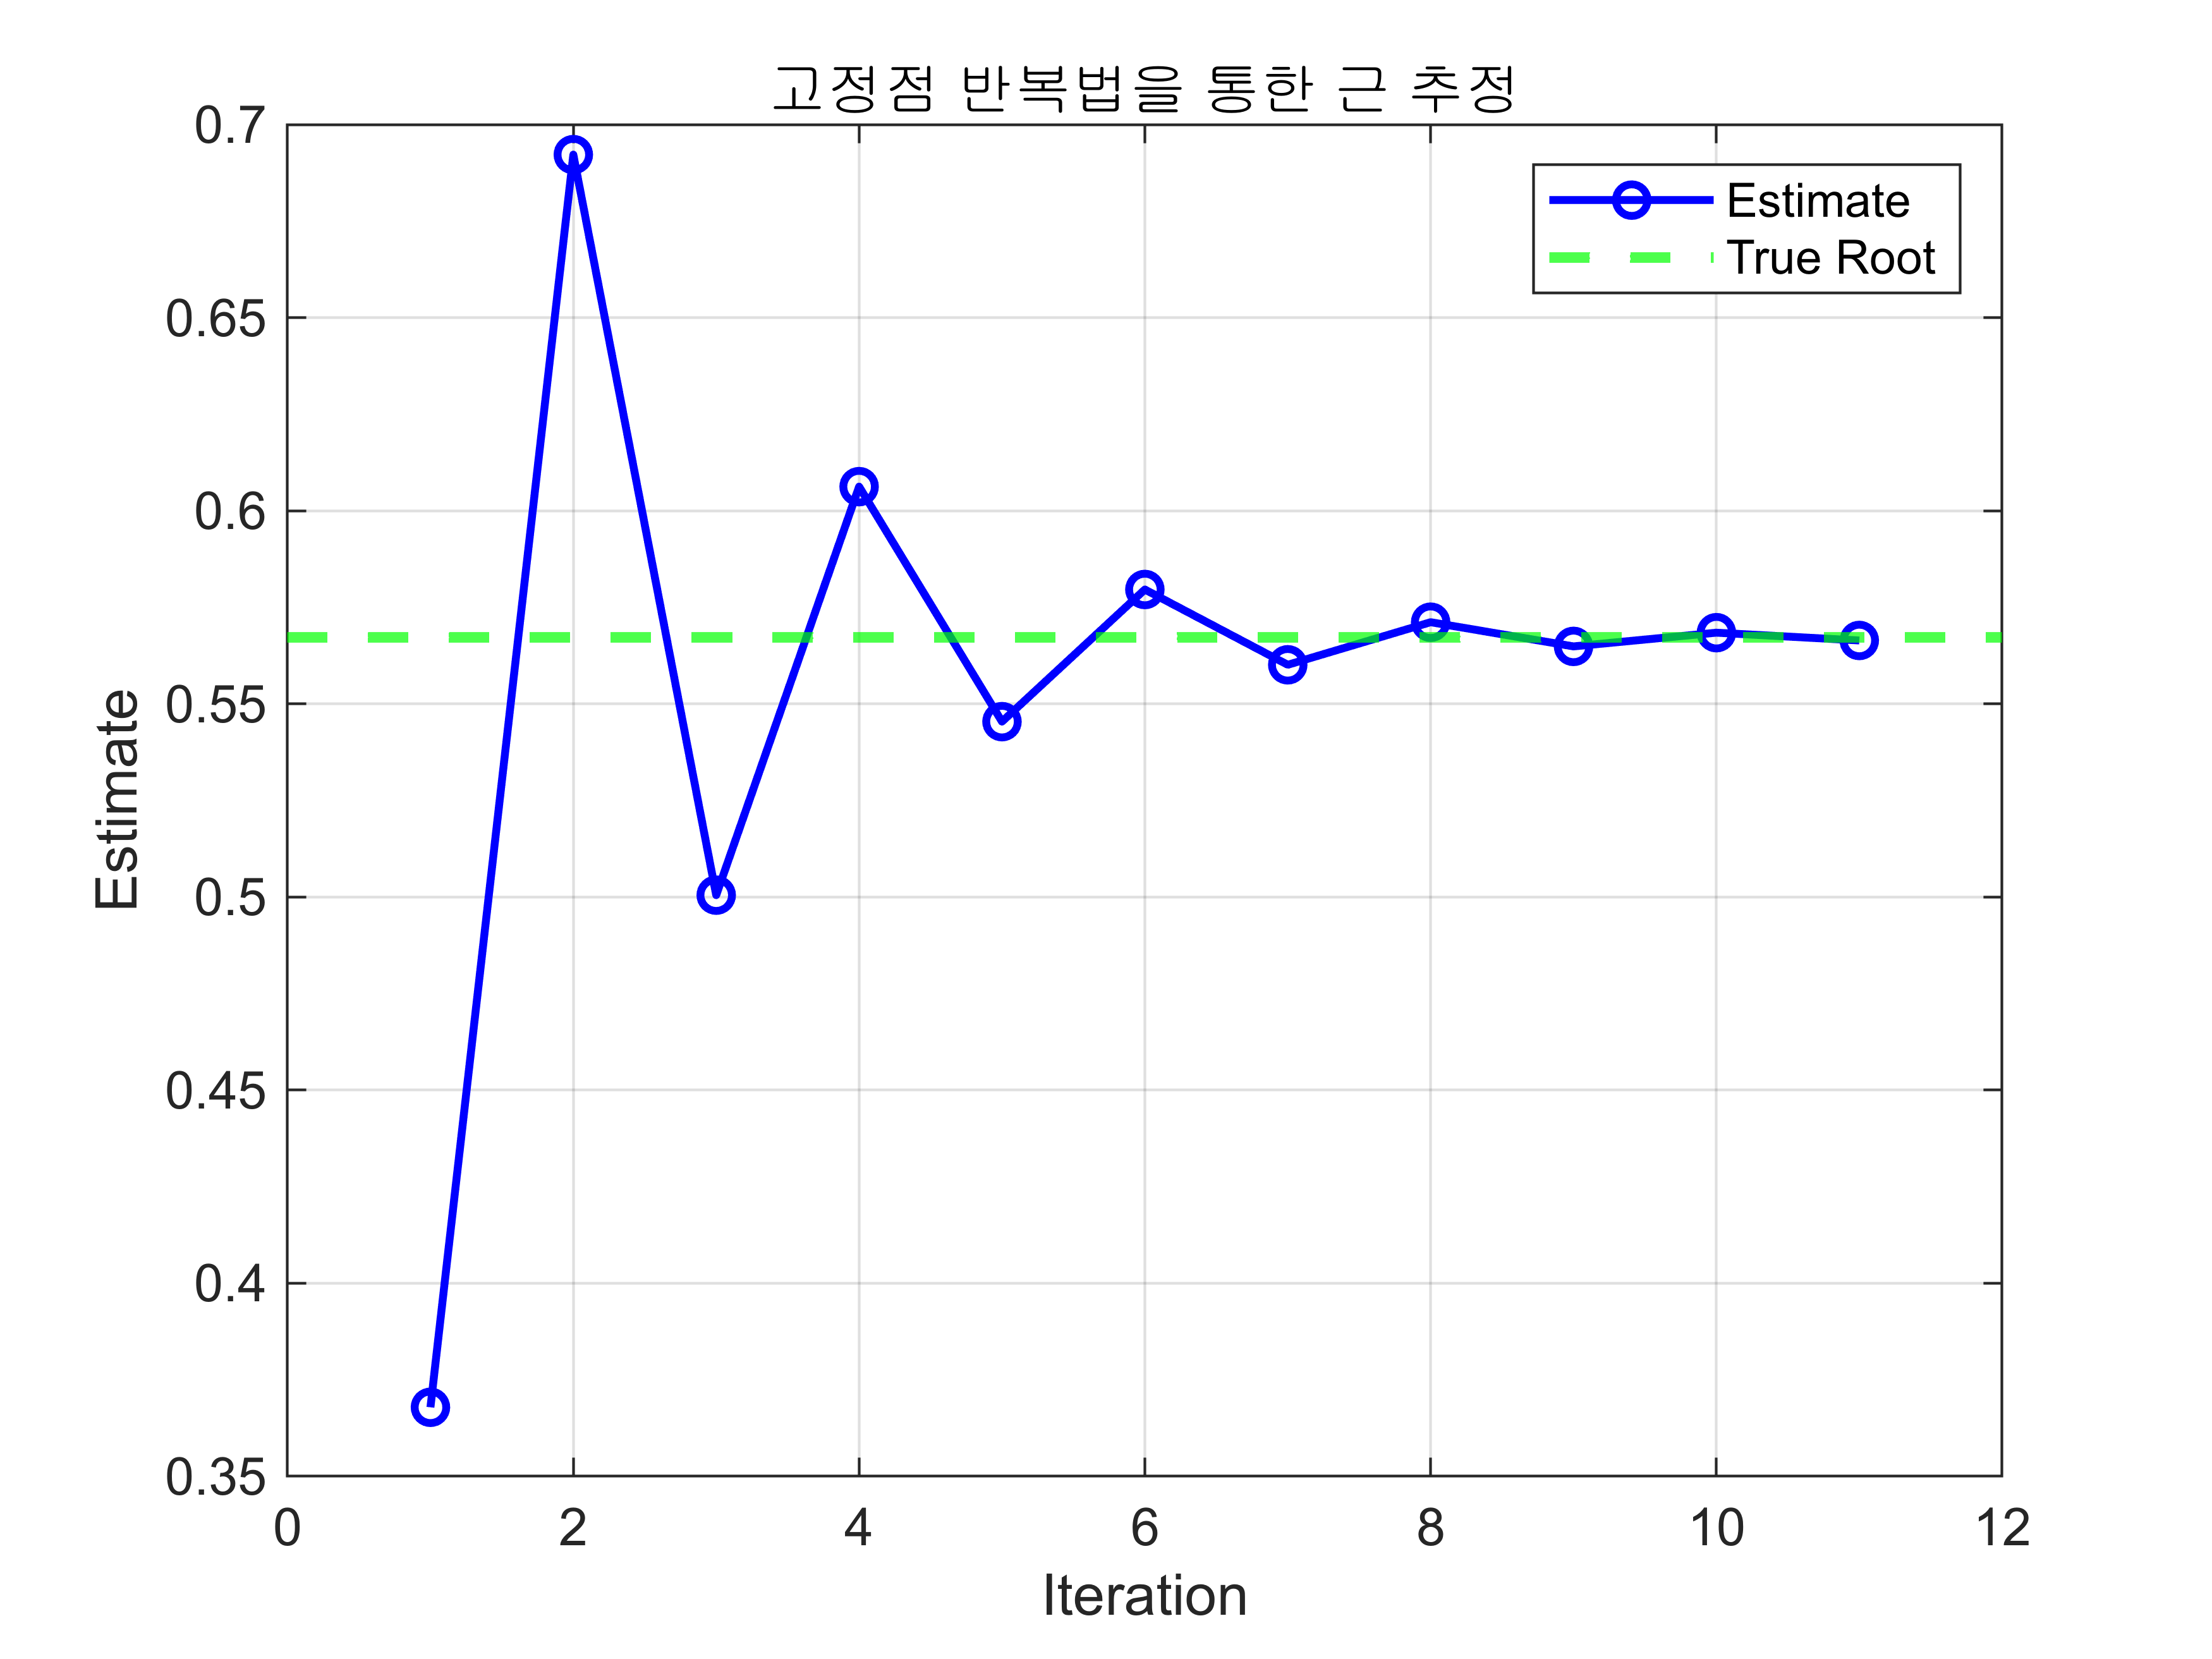


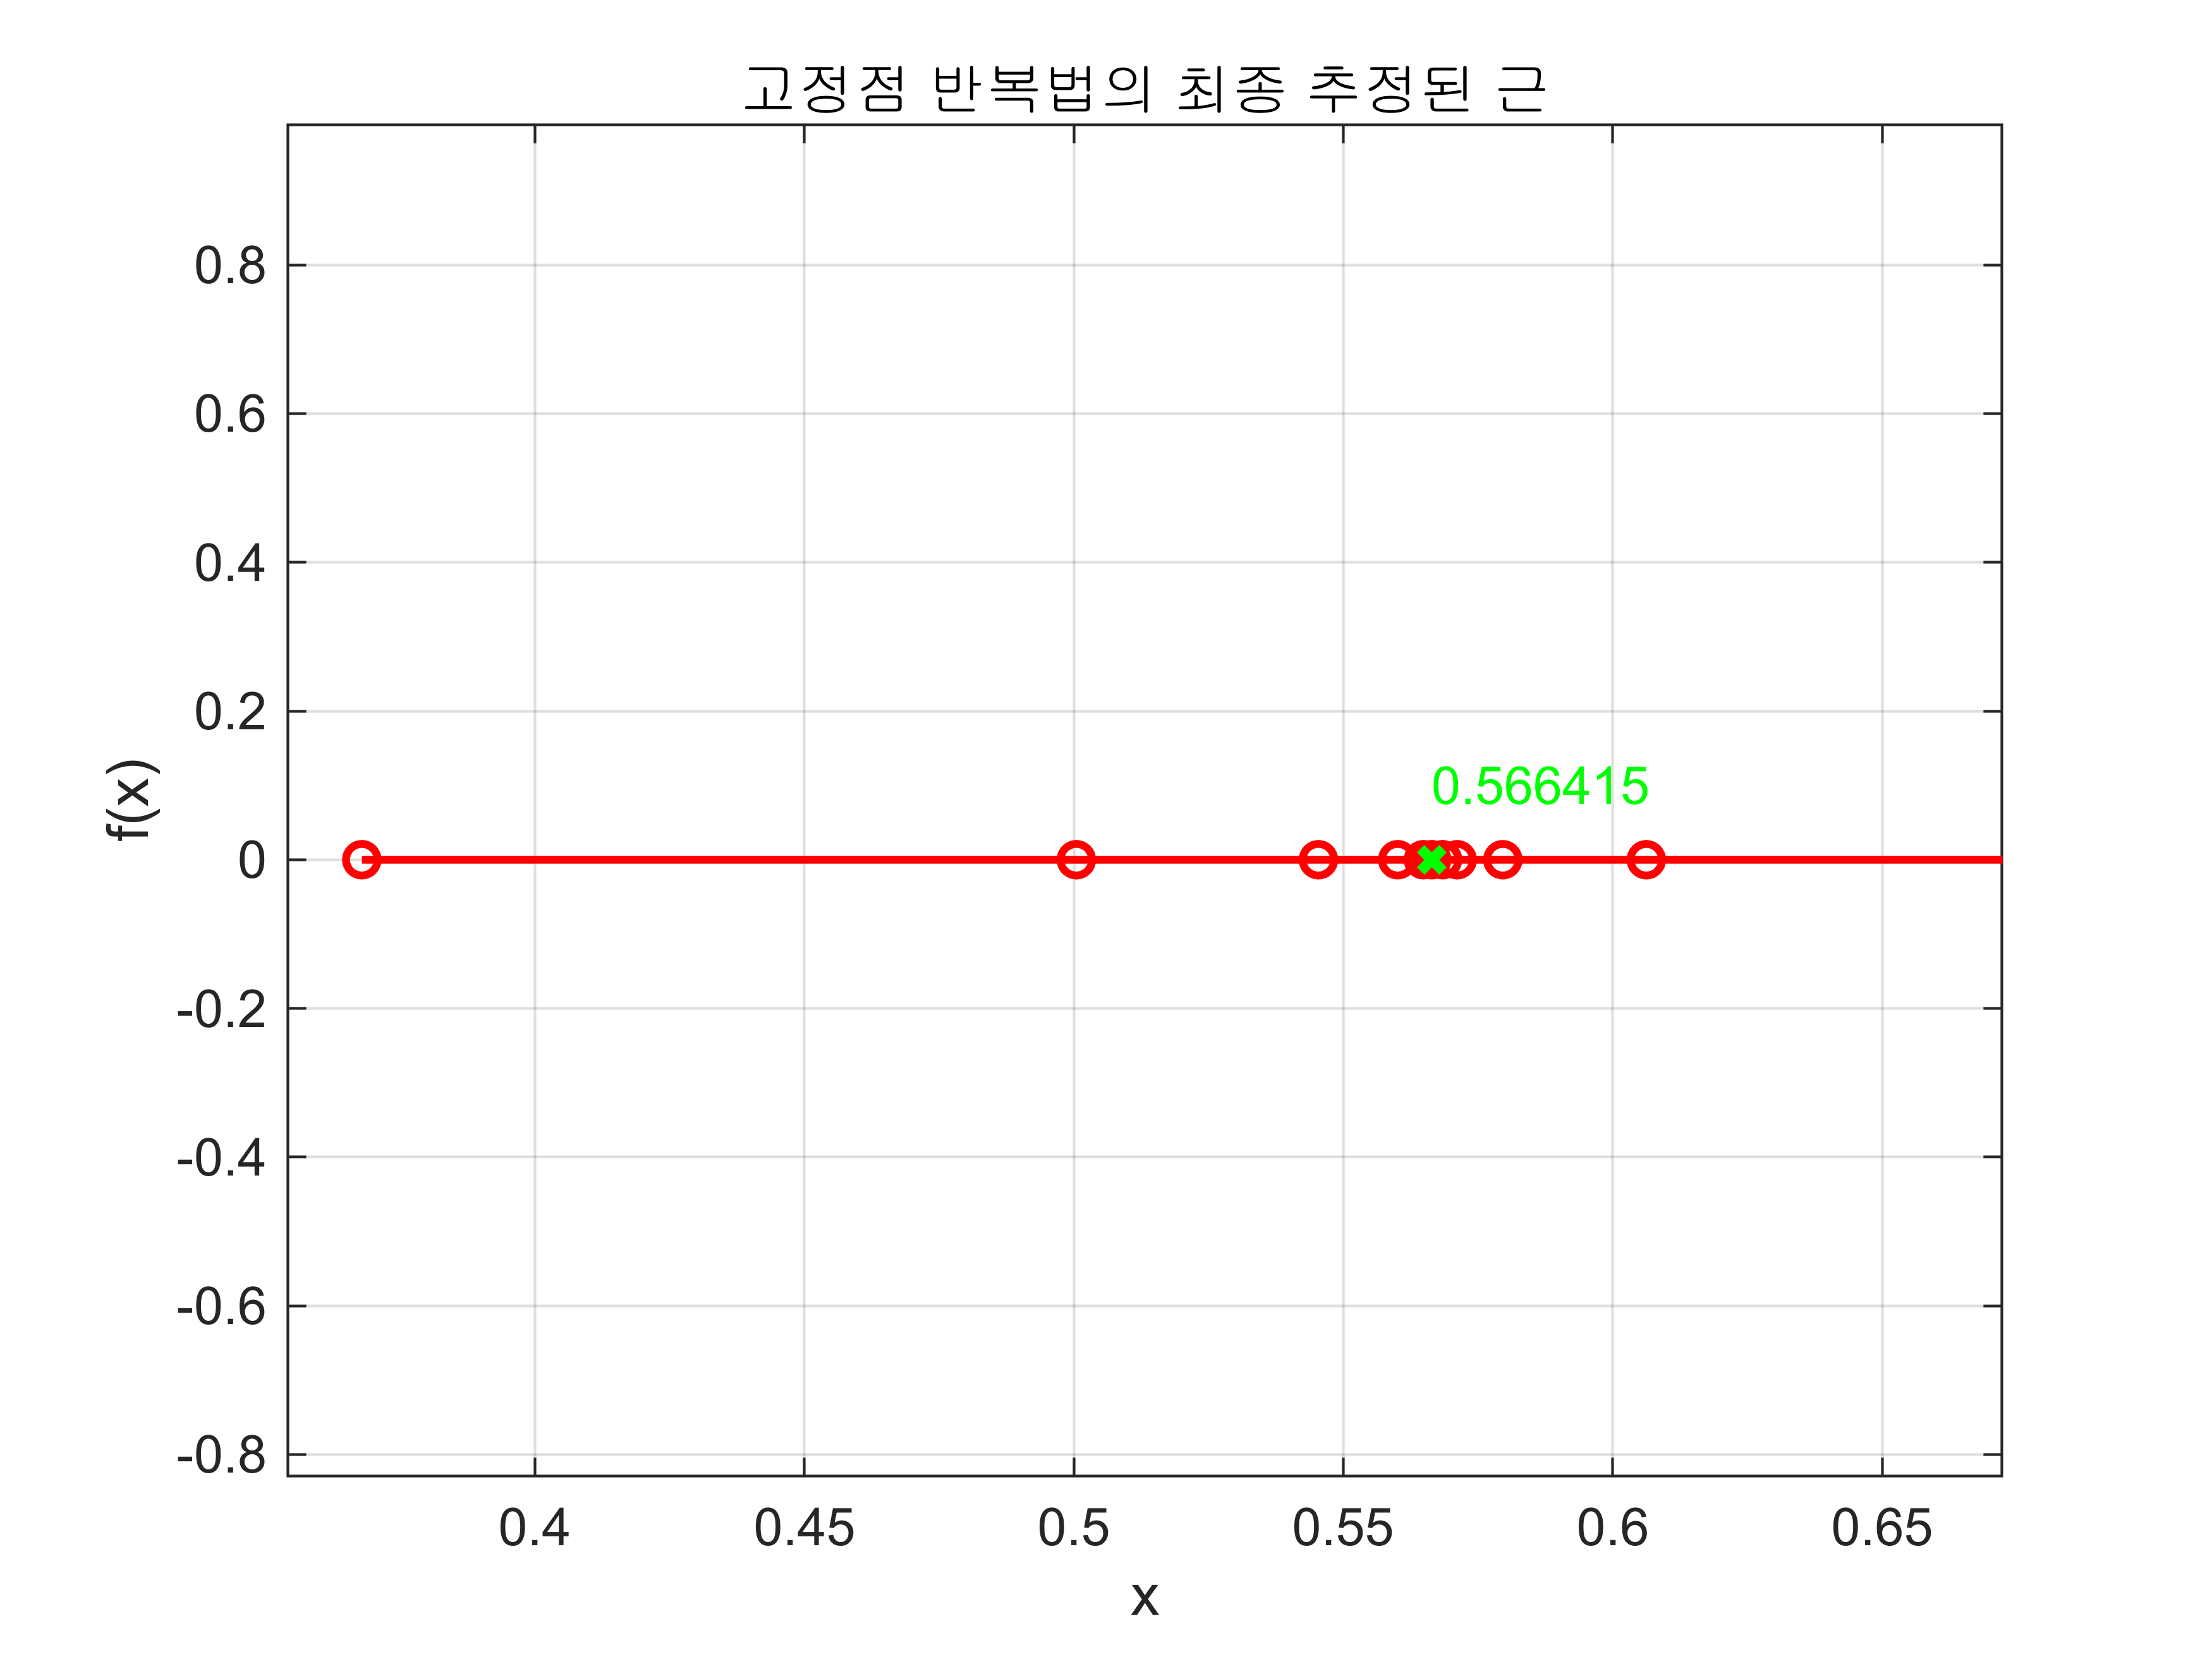

In [2]:
% 초기 값 설정 및 고정점 반복법 실행
NA6_1_FixedPoint(1);


**MATLAB 코드 요약**

-  함수 <samp>NA6_1_FixedPoint</samp>는 위 알고리즘을 MATLAB으로 구현한 것입니다.
-  주어진 $g(x)=e^{-x}$ 에 대해 반복적으로 추정치를 계산하고, 각 반복에서 추정된 근과 상대 오차를 출력합니다.
-  결과를 표로 나타내고, 최종 추정된 근을 그래프로 시각화합니다.

**수렴의 시각화**

-  그래프에서 $x=g(x)$ 의 교차점을 찾아가는 과정을 시각화할 수 있습니다.
-  반복 과정에서 $x_n$ ​이 $x=g(x)$ 에 점점 가까워지는 과정을 보여줍니다.

<p style="text-align:left">
   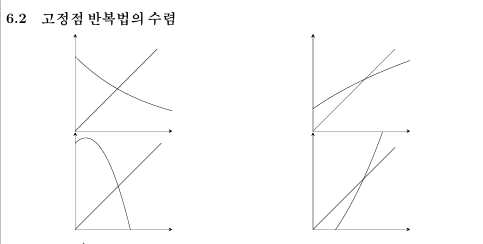
</p>


**고정점 반복법의 수렴에 대한 수식**

1.  **고정점 반복식과 오차 정의:**

-  고정점 반복법은 다음과 같이 정의됩니다:

$$x_{n+1} =g(x_n )$$

-  $x_{n+1}$ 와 $x_n$ 사이의 오차는 다음과 같습니다:

$$x_{n+1} -x_r =g(x_n )-g(x_r )$$

여기서 xrx\_rxr​은 실제 고정점(근)입니다.

1.  **평균값 정리의 적용:**

-  $g(x)$ 가 구간 $[a,b]$ 에서 연속이라면 평균값 정리에 의해 다음과 같은 관계를 만족하는 $\xi$ 가 존재합니다:

$$g^{\prime } (\xi )=\frac{g(b)-g(a)}{b-a}$$

-  이를 이용하여 오차 식을 전개하면:

$$x_{n+1} -x_r =g^{\prime } (\xi )(x_n -x_r )$$

-  즉, 반복 과정에서 오차 $E_{n+1}$ 와 이전 오차 $E_n$ ​ 사이의 관계는 다음과 같이 표현할 수 있습니다:

 $E_{n+1} =g^{\prime } (\xi )E_n$ ​


**수렴 조건**

-  고정점 반복법이 수렴하기 위해서는 함수 $g(x)$ 가 다음 조건을 만족해야 합니다:
-  **감소일 때:** $|g^{\prime } (x)|<1$
-  **증가일 때:** $|g^{\prime } (x)|>1$
-  **조건 의미:**
-  $|g^{\prime } (x)|<1:g(x)$ 의 기울기가 1보다 작아야 합니다. 이 경우, 반복 과정을 통해 $x_n$ ​이 점차 고정점 $x_r$ 에 가까워지게 됩니다. 이로 인해 수렴이 발생합니다.
-  $g^{\prime } (x)|>1$ : 이 경우 수렴하지 않고 발산하게 됩니다. 이때 고정점 반복법은 해당 방정식의 근을 찾기에 적합하지 않습니다.

**수렴의 선형성**

-  고정점 반복법은 수렴할 때 이전 단계의 오차에 비례하여 작아지는 선형 수렴을 나타냅니다.
-  즉, 수렴 과정에서 오차가 선형적으로 감소합니다.
-  수렴 속도는 $|g^{\prime } (x)|$ 의 크기에 따라 결정되며, $|g^{\prime } (x)|$ 가 작을수록 빠르게 수렴합니다.


**1. 왼쪽 상단 그래프**

-  **설명:**
-  이 그래프는 $g(x)$ 함수가 $x$ 축과 만나면서 점점 수렴하는 경우를 보여줍니다.
-  $g(x)$ 의 기울기 $|g^{\prime } (x)|$ 가 1보다 작을 때 수렴합니다.
-  이때, 함수 $g(x)$ 와 $y=x$ 가 만나는 교점이 고정점입니다.
-  초기 추정치에서 시작하여 $x_{n+1} =g(x_n )$ 을 반복하면 점점 고정점에 가까워집니다.
-  **수렴 조건:**
-  이 경우는 $|g^{\prime } (x)|<1$ 인 경우에 해당하며, 반복적으로 고정점으로 수렴합니다.

**2. 오른쪽 상단 그래프**

-  **설명:**
-  이 그래프는 $g(x)$ 의 기울기가 양수이지만, 1보다 작은 경우를 보여줍니다.
-  $g(x)$ 는 증가 함수이고, $g(x)$ 와 $y=x$ 가 교차하는 지점이 고정점입니다.
-  이 경우에도 수렴하며, 반복적으로 근에 가까워집니다.
-  **수렴 조건:**
-  $0<g^{\prime } (x)<1$ 인 경우로, 이때 역시 수렴합니다.
-  반복 과정을 통해 고정점에 점점 가까워집니다.

**3. 왼쪽 하단 그래프**

-  **설명:**
-  이 그래프는 $g(x)$ 의 기울기가 음수이며, 1보다 작은 경우를 보여줍니다.
-  $g(x)$ 와 $y=x$ 의 교점이 고정점이지만, 이 경우는 발산하지 않고 수렴합니다.
-  이 경우, 반복적으로 근에 가까워지는 모습을 보여줍니다.
-  **수렴 조건:**
-  $-1<g^{\prime } (x)<0$ 인 경우로, 이때 역시 수렴하며, 고정점에 가까워집니다.

**4. 오른쪽 하단 그래프**

-  **설명:**
-  이 그래프는 $g(x)$ 의 기울기가 1보다 큰 경우를 보여줍니다.
-  g(x)g(x)g(x)와 $y=x$ 가 교차하는 지점이 고정점이지만, 기울기가 1보다 크기 때문에 발산합니다.
-  반복 과정에서 $x_n$ 이 고정점에서 멀어지는 발산이 발생합니다.
-  **수렴 조건 위반:**
-  이 경우는 $|g^{\prime } (x)|>1$ 인 경우에 해당하며, 발산합니다.
-  따라서 이 경우에는 고정점 반복법을 사용하여 근을 찾을 수 없습니다.
